In [1]:
import analysis_parameters
import xarray as xr
import glob
import numpy as np
import matplotlib.pyplot as plt
import multimodelstats as mms

In [2]:
data_path = analysis_parameters.DIR_INTERMEDIATE_DATA
print(data_path)

/home/jovyan/local-climate-data-tool/Data/IntermediateData/


In [3]:
### this will go in a module

def get_scenario_fnames(data_path, scenario):
    """
    Get a string list of all zarr files in the data_path for the given 
    scenario. Prints the list to the user.
    """
    endcut = -1*len('.zarr')
    begcut = len(data_path)
    names = [f[begcut:endcut] for f in glob.glob(data_path + '*_' + scenario + '_*.zarr')]
    print(names)
    print('\n')
    
    return names

In [4]:
### this will also go in a module

def read_in_fname(data_path, fname):
    """Read in zarr file with name datapath/fname.zarr and return the correpsonding xarray"""
    filename = data_path + fname + '.zarr'
    return xr.open_zarr(filename)

# read in all the files:

In [5]:
### get the list of zarr files for some scenario from the directory
file_names_hist = get_scenario_fnames(data_path, 'historical')
file_names_126 = get_scenario_fnames(data_path, 'ssp126')
file_names_245 = get_scenario_fnames(data_path, 'ssp245')
file_names_370 = get_scenario_fnames(data_path, 'ssp370')
file_names_585 = get_scenario_fnames(data_path, 'ssp585')

print('{num} files in historical.'.format(num=len(file_names_hist)))
print('{num} files in ssp 126.'.format(num=len(file_names_126)))
print('{num} files in ssp 245.'.format(num=len(file_names_245)))
print('{num} files in ssp 370.'.format(num=len(file_names_370)))
print('{num} files in ssp 585.'.format(num=len(file_names_585)))


['tas_historical_SAM0-UNICON', 'tas_historical_GISS-E2-1-G', 'tas_historical_MIROC6', 'tas_historical_BCC-CSM2-MR', 'tas_historical_MIROC-ES2L', 'tas_historical_GISS-E2-1-H', 'tas_historical_CAMS-CSM1-0', 'tas_historical_GISS-E2-1-G-CC', 'tas_historical_NESM3', 'tas_historical_UKESM1-0-LL', 'tas_historical_MRI-ESM2-0', 'tas_historical_NorCPM1', 'tas_historical_CanESM5', 'tas_historical_MCM-UA-1-0', 'tas_historical_HadGEM3-GC31-LL', 'tas_historical_CESM2-WACCM']


['tas_ssp126_MCM-UA-1-0', 'tas_ssp126_MIROC-ES2L', 'tas_ssp126_MPI-ESM1-2-HR', 'tas_ssp126_MRI-ESM2-0', 'tas_ssp126_BCC-CSM2-MR', 'tas_ssp126_CAMS-CSM1-0', 'tas_ssp126_NESM3', 'tas_ssp126_MIROC6', 'tas_ssp126_UKESM1-0-LL', 'tas_ssp126_CESM2', 'tas_ssp126_CESM2-WACCM']


['tas_ssp245_MIROC-ES2L', 'tas_ssp245_MCM-UA-1-0', 'tas_ssp245_MIROC6', 'tas_ssp245_CanESM5', 'tas_ssp245_UKESM1-0-LL', 'tas_ssp245_BCC-CSM2-MR', 'tas_ssp245_MPI-ESM1-2-HR', 'tas_ssp245_CESM2', 'tas_ssp245_CESM2-WACCM', 'tas_ssp245_MRI-ESM2-0']


['tas_ssp370_M

In [6]:
### make a list of datasets of model data in this scencario
datasets_hist = [read_in_fname(data_path, x) for x in file_names_hist]
datasets_126 = [read_in_fname(data_path, x) for x in file_names_126]
datasets_245 = [read_in_fname(data_path, x) for x in file_names_245]
datasets_370 = [read_in_fname(data_path, x) for x in file_names_370]
datasets_585 = [read_in_fname(data_path, x) for x in file_names_585]

print('{num} models in historical.'.format(num=len(datasets_hist)))
print('{num} models in ssp 126.'.format(num=len(datasets_126)))
print('{num} models in ssp 245.'.format(num=len(datasets_245)))
print('{num} models in ssp 370.'.format(num=len(datasets_370)))
print('{num} models in ssp 585.'.format(num=len(datasets_585)))


16 models in historical.
11 models in ssp 126.
10 models in ssp 245.
10 models in ssp 370.
9 models in ssp 585.


# First, test for some city:

In [7]:
%%time

### test the multimodel stats function for some city
lt = 47
ln = -122

print('Historical:')
test_city_hist = mms.export_stats(datasets_hist, file_names_hist, is_global_mean=False, coords=[lt, ln])

print('\n\nSSP 126:')
test_city_126 = mms.export_stats(datasets_126, file_names_126, is_global_mean=False, coords=[lt, ln])

print('\n\nSSP 245:')
test_city_245 = mms.export_stats(datasets_245, file_names_245, is_global_mean=False, coords=[lt, ln])

print('\n\nSSP 370:')
test_city_370 = mms.export_stats(datasets_370, file_names_370, is_global_mean=False, coords=[lt, ln])

print('\n\nSSP 585:')
test_city_585 = mms.export_stats(datasets_585, file_names_585, is_global_mean=False, coords=[lt, ln])


Historical:
Selecting tas for SAM0-UNICON at (47, -122)...
Selecting tas for GISS-E2-1-G at (47, -122)...
Selecting tas for MIROC6 at (47, -122)...
Selecting tas for BCC-CSM2-MR at (47, -122)...
Selecting tas for MIROC-ES2L at (47, -122)...
Selecting tas for GISS-E2-1-H at (47, -122)...
Selecting tas for CAMS-CSM1-0 at (47, -122)...
Selecting tas for GISS-E2-1-G-CC at (47, -122)...
Selecting tas for NESM3 at (47, -122)...
Selecting tas for UKESM1-0-LL at (47, -122)...
Selecting tas for MRI-ESM2-0 at (47, -122)...
Selecting tas for NorCPM1 at (47, -122)...
Selecting tas for CanESM5 at (47, -122)...
Selecting tas for MCM-UA-1-0 at (47, -122)...
Selecting tas for HadGEM3-GC31-LL at (47, -122)...
Selecting tas for CESM2-WACCM at (47, -122)...
Computing multimodel mean of tas for 16 models...
Returned multimodel man. 0 models skipped.

Selecting tas for SAM0-UNICON at (47, -122)...
Selecting tas for GISS-E2-1-G at (47, -122)...
Selecting tas for MIROC6 at (47, -122)...
Selecting tas for BCC

/home/jovyan/local-climate-data-tool/Analysis/Phase1_ProcessData/multimodelstats.py:78: UserWarning: Skipping model CAMS-CSM1-0: inconsistent number of time steps for this scenario
  'scenario').format(name=model_name))


Selecting tas for CESM2 at (47, -122)...
Selecting tas for CESM2-WACCM at (47, -122)...
Computing multimodel mean of tas for 10 models...
Returned multimodel man. 1 models skipped.

Selecting tas for MCM-UA-1-0 at (47, -122)...
Selecting tas for MIROC-ES2L at (47, -122)...
Selecting tas for MPI-ESM1-2-HR at (47, -122)...
Selecting tas for MRI-ESM2-0 at (47, -122)...
Selecting tas for BCC-CSM2-MR at (47, -122)...
Selecting tas for NESM3 at (47, -122)...
Selecting tas for MIROC6 at (47, -122)...
Selecting tas for UKESM1-0-LL at (47, -122)...


/home/jovyan/local-climate-data-tool/Analysis/Phase1_ProcessData/multimodelstats.py:159: UserWarning: Skipping model CAMS-CSM1-0: inconsistent number of time steps for this scenario
  'scenario').format(name=model_name))


Selecting tas for CESM2 at (47, -122)...
Selecting tas for CESM2-WACCM at (47, -122)...
Computing multimodel minimum of tas for 10 models...
Returned multimodel minimum. 1 models skipped.

Selecting tas for MCM-UA-1-0 at (47, -122)...
Selecting tas for MIROC-ES2L at (47, -122)...
Selecting tas for MPI-ESM1-2-HR at (47, -122)...
Selecting tas for MRI-ESM2-0 at (47, -122)...
Selecting tas for BCC-CSM2-MR at (47, -122)...
Selecting tas for NESM3 at (47, -122)...
Selecting tas for MIROC6 at (47, -122)...
Selecting tas for UKESM1-0-LL at (47, -122)...


/home/jovyan/local-climate-data-tool/Analysis/Phase1_ProcessData/multimodelstats.py:240: UserWarning: Skipping model CAMS-CSM1-0: inconsistent number of time steps for this scenario
  'scenario').format(name=model_name))
/home/jovyan/local-climate-data-tool/Analysis/Phase1_ProcessData/multimodelstats.py:321: UserWarning: Skipping model CAMS-CSM1-0: inconsistent number of time steps for this scenario
  'scenario').format(name=model_name))


Selecting tas for CESM2 at (47, -122)...
Selecting tas for CESM2-WACCM at (47, -122)...
Computing multimodel maximum of tas for 10 models...
Returned multimodel maximum. 1 models skipped.

Selecting tas for MCM-UA-1-0 at (47, -122)...
Selecting tas for MIROC-ES2L at (47, -122)...
Selecting tas for MPI-ESM1-2-HR at (47, -122)...
Selecting tas for MRI-ESM2-0 at (47, -122)...
Selecting tas for BCC-CSM2-MR at (47, -122)...
Selecting tas for NESM3 at (47, -122)...
Selecting tas for MIROC6 at (47, -122)...
Selecting tas for UKESM1-0-LL at (47, -122)...
Selecting tas for CESM2 at (47, -122)...
Selecting tas for CESM2-WACCM at (47, -122)...
Computing multimodel standard deviation of tas for 10 models...
Returned multimodel standard deviation. 1 models skipped.



SSP 245:
Selecting tas for MIROC-ES2L at (47, -122)...
Selecting tas for MCM-UA-1-0 at (47, -122)...
Selecting tas for MIROC6 at (47, -122)...
Selecting tas for CanESM5 at (47, -122)...
Selecting tas for UKESM1-0-LL at (47, -122)...
S

/home/jovyan/local-climate-data-tool/Analysis/Phase1_ProcessData/multimodelstats.py:78: UserWarning: Skipping model CAMS-CSM1-0: inconsistent number of time steps for this scenario
  'scenario').format(name=model_name))
/home/jovyan/local-climate-data-tool/Analysis/Phase1_ProcessData/multimodelstats.py:78: UserWarning: Skipping model BCC-ESM1: inconsistent number of time steps for this scenario
  'scenario').format(name=model_name))


Selecting tas for BCC-CSM2-MR at (47, -122)...
Selecting tas for UKESM1-0-LL at (47, -122)...
Selecting tas for MRI-ESM2-0 at (47, -122)...
Selecting tas for CESM2 at (47, -122)...
Selecting tas for MCM-UA-1-0 at (47, -122)...
Selecting tas for CanESM5 at (47, -122)...
Computing multimodel mean of tas for 8 models...
Returned multimodel man. 2 models skipped.

Selecting tas for MIROC-ES2L at (47, -122)...
Selecting tas for MIROC6 at (47, -122)...


/home/jovyan/local-climate-data-tool/Analysis/Phase1_ProcessData/multimodelstats.py:159: UserWarning: Skipping model CAMS-CSM1-0: inconsistent number of time steps for this scenario
  'scenario').format(name=model_name))
/home/jovyan/local-climate-data-tool/Analysis/Phase1_ProcessData/multimodelstats.py:159: UserWarning: Skipping model BCC-ESM1: inconsistent number of time steps for this scenario
  'scenario').format(name=model_name))
/home/jovyan/local-climate-data-tool/Analysis/Phase1_ProcessData/multimodelstats.py:240: UserWarning: Skipping model CAMS-CSM1-0: inconsistent number of time steps for this scenario
  'scenario').format(name=model_name))
/home/jovyan/local-climate-data-tool/Analysis/Phase1_ProcessData/multimodelstats.py:240: UserWarning: Skipping model BCC-ESM1: inconsistent number of time steps for this scenario
  'scenario').format(name=model_name))


Selecting tas for BCC-CSM2-MR at (47, -122)...
Selecting tas for UKESM1-0-LL at (47, -122)...
Selecting tas for MRI-ESM2-0 at (47, -122)...
Selecting tas for CESM2 at (47, -122)...
Selecting tas for MCM-UA-1-0 at (47, -122)...
Selecting tas for CanESM5 at (47, -122)...
Computing multimodel minimum of tas for 8 models...
Returned multimodel minimum. 2 models skipped.

Selecting tas for MIROC-ES2L at (47, -122)...
Selecting tas for MIROC6 at (47, -122)...
Selecting tas for BCC-CSM2-MR at (47, -122)...
Selecting tas for UKESM1-0-LL at (47, -122)...
Selecting tas for MRI-ESM2-0 at (47, -122)...
Selecting tas for CESM2 at (47, -122)...
Selecting tas for MCM-UA-1-0 at (47, -122)...
Selecting tas for CanESM5 at (47, -122)...
Computing multimodel maximum of tas for 8 models...
Returned multimodel maximum. 2 models skipped.

Selecting tas for MIROC-ES2L at (47, -122)...
Selecting tas for MIROC6 at (47, -122)...
Selecting tas for BCC-CSM2-MR at (47, -122)...
Selecting tas for UKESM1-0-LL at (47,

/home/jovyan/local-climate-data-tool/Analysis/Phase1_ProcessData/multimodelstats.py:321: UserWarning: Skipping model CAMS-CSM1-0: inconsistent number of time steps for this scenario
  'scenario').format(name=model_name))
/home/jovyan/local-climate-data-tool/Analysis/Phase1_ProcessData/multimodelstats.py:321: UserWarning: Skipping model BCC-ESM1: inconsistent number of time steps for this scenario
  'scenario').format(name=model_name))


Selecting tas for CanESM5 at (47, -122)...
Computing multimodel standard deviation of tas for 8 models...
Returned multimodel standard deviation. 2 models skipped.



SSP 585:
Selecting tas for UKESM1-0-LL at (47, -122)...
Selecting tas for MIROC-ES2L at (47, -122)...
Selecting tas for MCM-UA-1-0 at (47, -122)...
Selecting tas for CESM2-WACCM at (47, -122)...
Selecting tas for BCC-CSM2-MR at (47, -122)...
Selecting tas for MRI-ESM2-0 at (47, -122)...
Selecting tas for MIROC6 at (47, -122)...
Selecting tas for MPI-ESM1-2-HR at (47, -122)...
Selecting tas for CESM2 at (47, -122)...
Computing multimodel mean of tas for 9 models...
Returned multimodel man. 0 models skipped.

Selecting tas for UKESM1-0-LL at (47, -122)...
Selecting tas for MIROC-ES2L at (47, -122)...
Selecting tas for MCM-UA-1-0 at (47, -122)...
Selecting tas for CESM2-WACCM at (47, -122)...
Selecting tas for BCC-CSM2-MR at (47, -122)...
Selecting tas for MRI-ESM2-0 at (47, -122)...
Selecting tas for MIROC6 at (47, -122)...

# test plots for city:

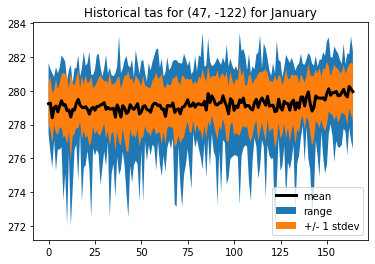

In [8]:
tspan = test_city_hist.time[::12]
plt.fill_between(x=range(len(tspan)), y1=test_city_hist['multi_min'].values[::12], 
                 y2=test_city_hist['multi_max'].values[::12], label='range')
plt.fill_between(x=range(len(tspan)), 
                 y1=test_city_hist['multi_mean'].values[::12]-test_city_hist['multi_std'].values[::12], 
                 y2=test_city_hist['multi_mean'].values[::12]+test_city_hist['multi_std'].values[::12], 
                 label='+/- 1 stdev')
plt.plot(range(len(tspan)), test_city_hist['multi_mean'].values[::12], label='mean', 
         color='k', linewidth=3)
plt.legend(loc='lower right')
plt.title(('Historical tas for ({lat}, {lon}) for January').format(lat=lt, lon=ln))
# plt.ylim([290, 309])
plt.show()

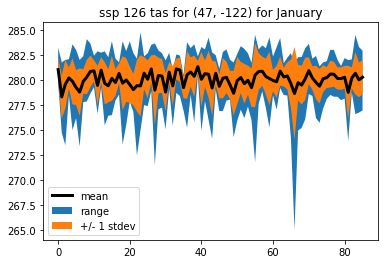

In [9]:
tspan = test_city_126.time[::12]
plt.fill_between(x=range(len(tspan)), y1=test_city_126['multi_min'].values[::12], 
                 y2=test_city_126['multi_max'].values[::12], label='range')
plt.fill_between(x=range(len(tspan)), 
                 y1=test_city_126['multi_mean'].values[::12]-test_city_126['multi_std'].values[::12], 
                 y2=test_city_126['multi_mean'].values[::12]+test_city_126['multi_std'].values[::12], 
                 label='+/- 1 stdev')
plt.plot(range(len(tspan)), test_city_126['multi_mean'].values[::12], label='mean', 
         color='k', linewidth=3)
plt.legend()
plt.title(('ssp 126 tas for ({lat}, {lon}) for January').format(lat=lt, lon=ln))
#plt.ylim([290, 309])
plt.show()

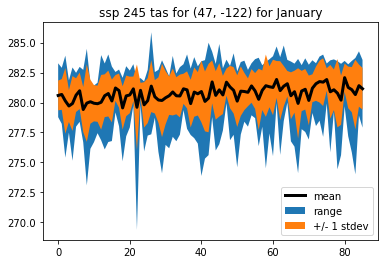

In [10]:
tspan = test_city_245.time[::12]
plt.fill_between(x=range(len(tspan)), y1=test_city_245['multi_min'].values[::12], 
                 y2=test_city_245['multi_max'].values[::12], label='range')
plt.fill_between(x=range(len(tspan)), 
                 y1=test_city_245['multi_mean'].values[::12]-test_city_245['multi_std'].values[::12], 
                 y2=test_city_245['multi_mean'].values[::12]+test_city_245['multi_std'].values[::12], 
                 label='+/- 1 stdev')
plt.plot(range(len(tspan)), test_city_245['multi_mean'].values[::12], label='mean', 
         color='k', linewidth=3)
plt.legend(loc='lower right')
plt.title(('ssp 245 tas for ({lat}, {lon}) for January').format(lat=lt, lon=ln))
# plt.ylim([290, 309])
plt.show()

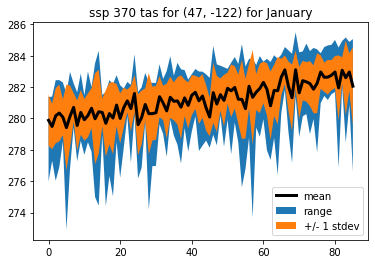

In [11]:
tspan = test_city_370.time[::12]
plt.fill_between(x=range(len(tspan)), y1=test_city_370['multi_min'].values[::12], 
                 y2=test_city_370['multi_max'].values[::12], label='range')
plt.fill_between(x=range(len(tspan)), 
                 y1=test_city_370['multi_mean'].values[::12]-test_city_370['multi_std'].values[::12], 
                 y2=test_city_370['multi_mean'].values[::12]+test_city_370['multi_std'].values[::12], 
                 label='+/- 1 stdev')
plt.plot(range(len(tspan)), test_city_370['multi_mean'].values[::12], label='mean', 
         color='k', linewidth=3)
plt.legend(loc='lower right')
plt.title(('ssp 370 tas for ({lat}, {lon}) for January').format(lat=lt, lon=ln))
# plt.ylim([290, 309])
plt.show()

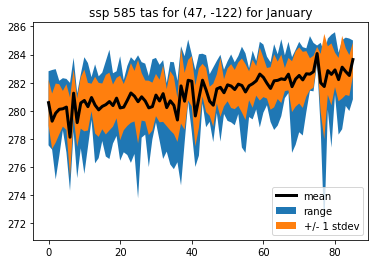

In [12]:
tspan = test_city_585.time[::12]
plt.fill_between(x=range(len(tspan)), y1=test_city_585['multi_min'].values[::12], 
                 y2=test_city_585['multi_max'].values[::12], label='range')
plt.fill_between(x=range(len(tspan)), 
                 y1=test_city_585['multi_mean'].values[::12]-test_city_585['multi_std'].values[::12], 
                 y2=test_city_585['multi_mean'].values[::12]+test_city_585['multi_std'].values[::12], 
                 label='+/- 1 stdev')
plt.plot(range(len(tspan)), test_city_585['multi_mean'].values[::12], label='mean', 
         color='k', linewidth=3)
plt.legend(loc='lower right')
plt.title(('ssp 585 tas for ({lat}, {lon}) for January').format(lat=lt, lon=ln))
# plt.ylim([290, 309])
plt.show()

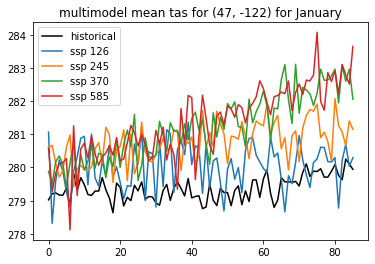

In [13]:
tspanhist = test_city_hist.time[948::12]
tspan126 = test_city_126.time[::12]
tspan245 = test_city_245.time[::12]
tspan370 = test_city_370.time[::12]
tspan585 = test_city_585.time[::12]

plt.plot(range(len(tspanhist)), test_city_hist['multi_mean'].values[948::12], label='historical', 
         color='k')
plt.plot(range(len(tspan126)), test_city_126['multi_mean'].values[::12], label='ssp 126', 
         color='C0')
plt.plot(range(len(tspan245)), test_city_245['multi_mean'].values[::12], label='ssp 245', 
         color='C1')
plt.plot(range(len(tspan370)), test_city_370['multi_mean'].values[::12], label='ssp 370', 
         color='C2')
plt.plot(range(len(tspan585)), test_city_585['multi_mean'].values[::12], label='ssp 585', 
         color='C3')
plt.legend(loc='upper left')
plt.title(('multimodel mean tas for ({lat}, {lon}) for January').format(lat=lt, lon=ln))
# plt.ylim([295, 306])
plt.show()

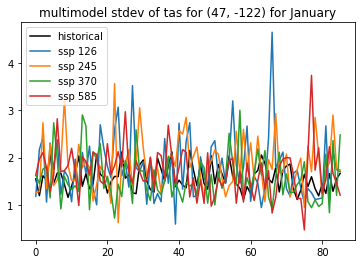

In [14]:
### plot standard deviation
tspanhist = test_city_hist.time[948::12]
tspan126 = test_city_126.time[::12]
tspan245 = test_city_245.time[::12]
tspan370 = test_city_370.time[::12]
tspan585 = test_city_585.time[::12]

plt.plot(range(len(tspanhist)), test_city_hist['multi_std'].values[948::12], label='historical', 
         color='k')
plt.plot(range(len(tspan126)), test_city_126['multi_std'].values[::12], label='ssp 126', 
         color='C0')
plt.plot(range(len(tspan245)), test_city_245['multi_std'].values[::12], label='ssp 245', 
         color='C1')
plt.plot(range(len(tspan370)), test_city_370['multi_std'].values[::12], label='ssp 370', 
         color='C2')
plt.plot(range(len(tspan585)), test_city_585['multi_std'].values[::12], label='ssp 585', 
         color='C3')
plt.legend(loc='upper left')
plt.title(('multimodel stdev of tas for ({lat}, {lon}) for January').format(lat=lt, lon=ln))
# plt.ylim([295, 306])
plt.show()

# now, test global mean...

In [15]:
gm_data_path = data_path + 'GlobalMeanData/'
print(gm_data_path)

/home/jovyan/local-climate-data-tool/Data/IntermediateData/GlobalMeanData/


In [16]:
### get the list of GLOBAL MEAN zarr files for some scenario from the directory
gm_file_names_hist = get_scenario_fnames(gm_data_path, 'historical')
gm_file_names_126 = get_scenario_fnames(gm_data_path, 'ssp126')
gm_file_names_245 = get_scenario_fnames(gm_data_path, 'ssp245')
gm_file_names_370 = get_scenario_fnames(gm_data_path, 'ssp370')
gm_file_names_585 = get_scenario_fnames(gm_data_path, 'ssp585')

print('{num} files in historical.'.format(num=len(gm_file_names_hist)))
print('{num} files in ssp 126.'.format(num=len(gm_file_names_126)))
print('{num} files in ssp 245.'.format(num=len(gm_file_names_245)))
print('{num} files in ssp 370.'.format(num=len(gm_file_names_370)))
print('{num} files in ssp 585.'.format(num=len(gm_file_names_585)))


['tas_historical_BCC-CSM2-MR_GLOBALMEAN', 'tas_historical_MCM-UA-1-0_GLOBALMEAN', 'tas_historical_UKESM1-0-LL_GLOBALMEAN', 'tas_historical_SAM0-UNICON_GLOBALMEAN', 'tas_historical_MIROC-ES2L_GLOBALMEAN', 'tas_historical_MRI-ESM2-0_GLOBALMEAN', 'tas_historical_NESM3_GLOBALMEAN', 'tas_historical_CESM2-WACCM_GLOBALMEAN', 'tas_historical_CAMS-CSM1-0_GLOBALMEAN', 'tas_historical_NorCPM1_GLOBALMEAN', 'tas_historical_CanESM5_GLOBALMEAN', 'tas_historical_GISS-E2-1-H_GLOBALMEAN', 'tas_historical_MIROC6_GLOBALMEAN', 'tas_historical_GISS-E2-1-G-CC_GLOBALMEAN', 'tas_historical_HadGEM3-GC31-LL_GLOBALMEAN', 'tas_historical_GISS-E2-1-G_GLOBALMEAN']


['tas_ssp126_CAMS-CSM1-0_GLOBALMEAN', 'tas_ssp126_BCC-CSM2-MR_GLOBALMEAN', 'tas_ssp126_CESM2-WACCM_GLOBALMEAN', 'tas_ssp126_CESM2_GLOBALMEAN', 'tas_ssp126_MIROC6_GLOBALMEAN', 'tas_ssp126_MCM-UA-1-0_GLOBALMEAN', 'tas_ssp126_MRI-ESM2-0_GLOBALMEAN', 'tas_ssp126_MPI-ESM1-2-HR_GLOBALMEAN', 'tas_ssp126_UKESM1-0-LL_GLOBALMEAN', 'tas_ssp126_NESM3_GLOBALMEAN', 't

In [17]:
### make a list of GLOBAL MEAN datasets of model data in this scencario
gm_datasets_hist = [read_in_fname(gm_data_path, x) for x in gm_file_names_hist]
gm_datasets_126 = [read_in_fname(gm_data_path, x) for x in gm_file_names_126]
gm_datasets_245 = [read_in_fname(gm_data_path, x) for x in gm_file_names_245]
gm_datasets_370 = [read_in_fname(gm_data_path, x) for x in gm_file_names_370]
gm_datasets_585 = [read_in_fname(gm_data_path, x) for x in gm_file_names_585]

print('{num} models in historical.'.format(num=len(gm_datasets_hist)))
print('{num} models in ssp 126.'.format(num=len(gm_datasets_126)))
print('{num} models in ssp 245.'.format(num=len(gm_datasets_245)))
print('{num} models in ssp 370.'.format(num=len(gm_datasets_370)))
print('{num} models in ssp 585.'.format(num=len(gm_datasets_585)))

16 models in historical.
11 models in ssp 126.
10 models in ssp 245.
10 models in ssp 370.
9 models in ssp 585.


In [18]:
%%time

### test the multimodel stats function for global averages
print('Historical:')
test_globe_hist = mms.export_stats(gm_datasets_hist, gm_file_names_hist, is_global_mean=True)

print('\n\nSSP 126:')
test_globe_126 = mms.export_stats(gm_datasets_126, gm_file_names_126, is_global_mean=True)

print('\n\nSSP 245:')
test_globe_245 = mms.export_stats(gm_datasets_245, gm_file_names_245, is_global_mean=True)

print('\n\nSSP 370:')
test_globe_370 = mms.export_stats(gm_datasets_370, gm_file_names_370, is_global_mean=True)

print('\n\nSSP 585:')
test_globe_585 = mms.export_stats(gm_datasets_585, gm_file_names_585, is_global_mean=True)



Historical:
Selecting global mean of tas for BCC-CSM2-MR...
Selecting global mean of tas for MCM-UA-1-0...
Selecting global mean of tas for UKESM1-0-LL...
Selecting global mean of tas for SAM0-UNICON...
Selecting global mean of tas for MIROC-ES2L...
Selecting global mean of tas for MRI-ESM2-0...
Selecting global mean of tas for NESM3...
Selecting global mean of tas for CESM2-WACCM...
Selecting global mean of tas for CAMS-CSM1-0...
Selecting global mean of tas for NorCPM1...
Selecting global mean of tas for CanESM5...
Selecting global mean of tas for GISS-E2-1-H...
Selecting global mean of tas for MIROC6...
Selecting global mean of tas for GISS-E2-1-G-CC...
Selecting global mean of tas for HadGEM3-GC31-LL...
Selecting global mean of tas for GISS-E2-1-G...
Computing multimodel mean of tas for 16 models...
Returned multimodel man. 0 models skipped.

Selecting global mean of tas for BCC-CSM2-MR...
Selecting global mean of tas for MCM-UA-1-0...
Selecting global mean of tas for UKESM1-0-LL..

/home/jovyan/local-climate-data-tool/Analysis/Phase1_ProcessData/multimodelstats.py:78: UserWarning: Skipping model BCC-CSM2-MR: inconsistent number of time steps for this scenario
  'scenario').format(name=model_name))
/home/jovyan/local-climate-data-tool/Analysis/Phase1_ProcessData/multimodelstats.py:78: UserWarning: Skipping model CESM2-WACCM: inconsistent number of time steps for this scenario
  'scenario').format(name=model_name))
/home/jovyan/local-climate-data-tool/Analysis/Phase1_ProcessData/multimodelstats.py:78: UserWarning: Skipping model CESM2: inconsistent number of time steps for this scenario
  'scenario').format(name=model_name))
/home/jovyan/local-climate-data-tool/Analysis/Phase1_ProcessData/multimodelstats.py:78: UserWarning: Skipping model MIROC6: inconsistent number of time steps for this scenario
  'scenario').format(name=model_name))
/home/jovyan/local-climate-data-tool/Analysis/Phase1_ProcessData/multimodelstats.py:78: UserWarning: Skipping model MCM-UA-1-0: inc

Computing multimodel mean of tas for 10 models...
Returned multimodel man. 0 models skipped.

Selecting global mean of tas for CanESM5...
Selecting global mean of tas for MPI-ESM1-2-HR...
Selecting global mean of tas for UKESM1-0-LL...
Selecting global mean of tas for CESM2...
Selecting global mean of tas for MRI-ESM2-0...
Selecting global mean of tas for CESM2-WACCM...
Selecting global mean of tas for MIROC-ES2L...
Selecting global mean of tas for MCM-UA-1-0...
Selecting global mean of tas for MIROC6...
Selecting global mean of tas for BCC-CSM2-MR...
Computing multimodel minimum of tas for 10 models...
Returned multimodel minimum. 0 models skipped.

Selecting global mean of tas for CanESM5...
Selecting global mean of tas for MPI-ESM1-2-HR...
Selecting global mean of tas for UKESM1-0-LL...
Selecting global mean of tas for CESM2...
Selecting global mean of tas for MRI-ESM2-0...
Selecting global mean of tas for CESM2-WACCM...
Selecting global mean of tas for MIROC-ES2L...
Selecting globa

/home/jovyan/local-climate-data-tool/Analysis/Phase1_ProcessData/multimodelstats.py:321: UserWarning: Skipping model CAMS-CSM1-0: inconsistent number of time steps for this scenario
  'scenario').format(name=model_name))
/home/jovyan/local-climate-data-tool/Analysis/Phase1_ProcessData/multimodelstats.py:321: UserWarning: Skipping model BCC-ESM1: inconsistent number of time steps for this scenario
  'scenario').format(name=model_name))


# test plots for global:

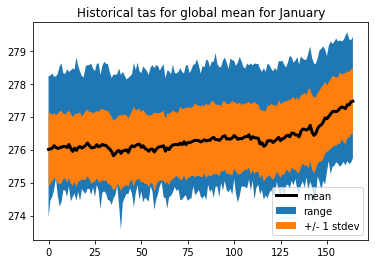

In [20]:
tspan = test_globe_hist.time[::12]
plt.fill_between(x=range(len(tspan)), y1=test_globe_hist['multi_min'].values[::12], 
                 y2=test_globe_hist['multi_max'].values[::12], label='range')
plt.fill_between(x=range(len(tspan)), 
                 y1=test_globe_hist['multi_mean'].values[::12]-test_globe_hist['multi_std'].values[::12], 
                 y2=test_globe_hist['multi_mean'].values[::12]+test_globe_hist['multi_std'].values[::12], 
                 label='+/- 1 stdev')
plt.plot(range(len(tspan)), test_globe_hist['multi_mean'].values[::12], label='mean', 
         color='k', linewidth=3)
plt.legend(loc='lower right')
plt.title(('Historical tas for global mean for January'))
# plt.ylim([290, 309])
plt.show()

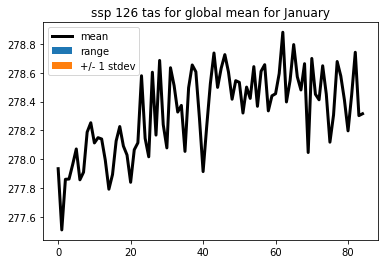

In [21]:
tspan = test_globe_126.time[::12]
plt.fill_between(x=range(len(tspan)), y1=test_globe_126['multi_min'].values[::12], 
                 y2=test_globe_126['multi_max'].values[::12], label='range')
plt.fill_between(x=range(len(tspan)), 
                 y1=test_globe_126['multi_mean'].values[::12]-test_globe_126['multi_std'].values[::12], 
                 y2=test_globe_126['multi_mean'].values[::12]+test_globe_126['multi_std'].values[::12], 
                 label='+/- 1 stdev')
plt.plot(range(len(tspan)), test_globe_126['multi_mean'].values[::12], label='mean', 
         color='k', linewidth=3)
plt.legend()
plt.title(('ssp 126 tas for global mean for January'))
#plt.ylim([290, 309])
plt.show()

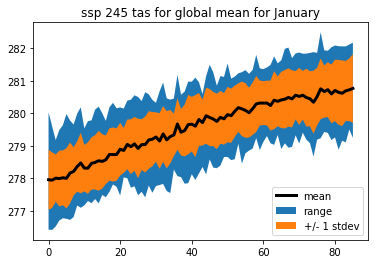

In [22]:
tspan = test_globe_245.time[::12]
plt.fill_between(x=range(len(tspan)), y1=test_globe_245['multi_min'].values[::12], 
                 y2=test_globe_245['multi_max'].values[::12], label='range')
plt.fill_between(x=range(len(tspan)), 
                 y1=test_globe_245['multi_mean'].values[::12]-test_globe_245['multi_std'].values[::12], 
                 y2=test_globe_245['multi_mean'].values[::12]+test_globe_245['multi_std'].values[::12], 
                 label='+/- 1 stdev')
plt.plot(range(len(tspan)), test_globe_245['multi_mean'].values[::12], label='mean', 
         color='k', linewidth=3)
plt.legend(loc='lower right')
plt.title(('ssp 245 tas for global mean for January'))
# plt.ylim([290, 309])
plt.show()

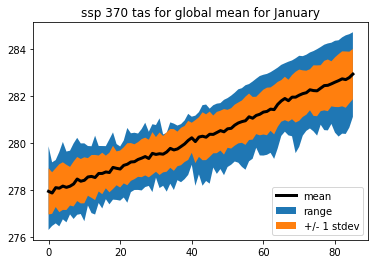

In [23]:
tspan = test_globe_370.time[::12]
plt.fill_between(x=range(len(tspan)), y1=test_globe_370['multi_min'].values[::12], 
                 y2=test_globe_370['multi_max'].values[::12], label='range')
plt.fill_between(x=range(len(tspan)), 
                 y1=test_globe_370['multi_mean'].values[::12]-test_globe_370['multi_std'].values[::12], 
                 y2=test_globe_370['multi_mean'].values[::12]+test_globe_370['multi_std'].values[::12], 
                 label='+/- 1 stdev')
plt.plot(range(len(tspan)), test_globe_370['multi_mean'].values[::12], label='mean', 
         color='k', linewidth=3)
plt.legend(loc='lower right')
plt.title(('ssp 370 tas for global mean for January'))
# plt.ylim([290, 309])
plt.show()

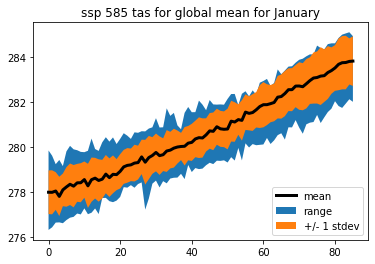

In [24]:
tspan = test_globe_585.time[::12]
plt.fill_between(x=range(len(tspan)), y1=test_globe_585['multi_min'].values[::12], 
                 y2=test_globe_585['multi_max'].values[::12], label='range')
plt.fill_between(x=range(len(tspan)), 
                 y1=test_globe_585['multi_mean'].values[::12]-test_globe_585['multi_std'].values[::12], 
                 y2=test_globe_585['multi_mean'].values[::12]+test_globe_585['multi_std'].values[::12], 
                 label='+/- 1 stdev')
plt.plot(range(len(tspan)), test_globe_585['multi_mean'].values[::12], label='mean', 
         color='k', linewidth=3)
plt.legend(loc='lower right')
plt.title(('ssp 585 tas for global mean for January'))
# plt.ylim([290, 309])
plt.show()

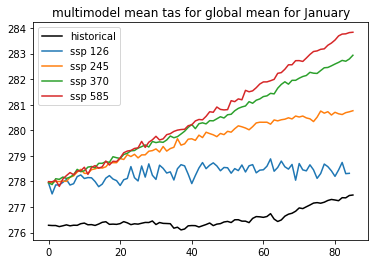

In [25]:
tspanhist = test_globe_hist.time[948::12]
tspan126 = test_globe_126.time[::12]
tspan245 = test_globe_245.time[::12]
tspan370 = test_globe_370.time[::12]
tspan585 = test_globe_585.time[::12]

plt.plot(range(len(tspanhist)), test_globe_hist['multi_mean'].values[948::12], label='historical', 
         color='k')
plt.plot(range(len(tspan126)), test_globe_126['multi_mean'].values[::12], label='ssp 126', 
         color='C0')
plt.plot(range(len(tspan245)), test_globe_245['multi_mean'].values[::12], label='ssp 245', 
         color='C1')
plt.plot(range(len(tspan370)), test_globe_370['multi_mean'].values[::12], label='ssp 370', 
         color='C2')
plt.plot(range(len(tspan585)), test_globe_585['multi_mean'].values[::12], label='ssp 585', 
         color='C3')
plt.legend(loc='upper left')
plt.title(('multimodel mean tas for global mean for January'))
# plt.ylim([295, 306])
plt.show()

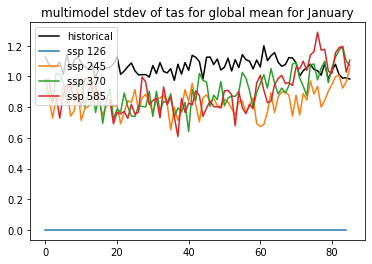

In [26]:
### plot standard deviation
tspanhist = test_globe_hist.time[948::12]
tspan126 = test_globe_126.time[::12]
tspan245 = test_globe_245.time[::12]
tspan370 = test_globe_370.time[::12]
tspan585 = test_globe_585.time[::12]

plt.plot(range(len(tspanhist)), test_globe_hist['multi_std'].values[948::12], label='historical', 
         color='k')
plt.plot(range(len(tspan126)), test_globe_126['multi_std'].values[::12], label='ssp 126', 
         color='C0')
plt.plot(range(len(tspan245)), test_globe_245['multi_std'].values[::12], label='ssp 245', 
         color='C1')
plt.plot(range(len(tspan370)), test_globe_370['multi_std'].values[::12], label='ssp 370', 
         color='C2')
plt.plot(range(len(tspan585)), test_globe_585['multi_std'].values[::12], label='ssp 585', 
         color='C3')
plt.legend(loc='upper left')
plt.title(('multimodel stdev of tas for global mean for January'))
# plt.ylim([295, 306])
plt.show()